# Introducing TensorFlow with Image Processing
There is a lot of material out there on Deep Learning.  My objective, and I must admit, a greedy one, is to gather together what I consider to be the important material into one spot for my reference and learning.  Hopefully, it will help others as well.

I draw from numerous sources and will give proper credit.  These include:
* [Kadenze](https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-iv) - "the highest rated MOOC of all time"

This tutorial revolves around image processing, but it is a great introduction to several important technologies used in deep learning.

# Interfaces
TensorFlow is the heavy hitter of course, but lately Keras has become quite popular because it is easier to use.  Keras actually wraps TensorFlow, but we shall see if the rule stays true: the wrapper doesn't contain all the capability of the underlying package.

My goal will be to show both:
* [TensorFlow](https://www.tensorflow.org/)
* [Keras](https://keras.io/)

First we work through how to prepare images for processing when doing image recognition, then we launch into the basics of [tensorflow](#TensorFlow).

# Test Data
From Kadenze:

[Deep Learning Datasets](http://deeplearning.net/datasets/)

From Wikipedia:

[More Deep Learning Datasets](https://en.wikipedia.org/wiki/List_of_datasets_for_machine_learning_research)

See and Google also:

* [MNIST](http://yann.lecun.com/exdb/mnist/)
* CalTech
* CelebNet
* [ImageNet](http://www.image-net.org/)
* LFW
* CIFAR10
* CIFAR100
* [MS Coco](http://mscoco.org/home/)
* [WLFDB](http://wlfdb.stevenhoi.com/)
* [Flickr 8k](http://nlp.cs.illinois.edu/HockenmaierGroup/Framing_Image_Description/KCCA.html)
* Flickr 30k

# Preprocessing Data
## Image Data
We follow the outline given in Kadenze.  I highly recommend looking at [code](https://github.com/pkmital/CADL/blob/master/session-1/session-1.ipynb) from this course.  The author takes care to write what appears to be robust code.

**Load Required Libraries**

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

Use the image dataset for faces called the CelebFaces dataset with a utility for loading and manipulating images from this dataset.  Get and print the an image from the set.

In [2]:
from utils import kdutils
# utils.<tab>
files = kdutils.get_celeb_files()

img = plt.imread(files[50])
# img.<tab>
print(img)
print('Image Dimensions: {}'.format(img.shape))

[[[ 22   2   4]
  [ 21   1   3]
  [ 19   0   2]
  ..., 
  [  8   4   3]
  [ 16   0   0]
  [ 16   0   0]]

 [[ 22   2   4]
  [ 21   1   3]
  [ 19   0   2]
  ..., 
  [  8   4   3]
  [ 16   0   0]
  [ 16   0   0]]

 [[ 22   2   4]
  [ 21   1   3]
  [ 19   0   2]
  ..., 
  [  8   4   3]
  [ 16   0   0]
  [ 16   0   0]]

 ..., 
 [[176 101  36]
  [178 103  38]
  [184 109  44]
  ..., 
  [208 134 107]
  [210 145 105]
  [210 145 105]]

 [[182 107  42]
  [194 119  54]
  [195 119  57]
  ..., 
  [205 140 110]
  [213 148 106]
  [213 148 106]]

 [[189 115  50]
  [202 128  63]
  [203 129  66]
  ..., 
  [210 156 120]
  [209 144 102]
  [209 144 102]]]
Image Dimensions: (218, 178, 3)


An image consists of nx (178) by ny (218) triples representing RGB from 0 to 255.

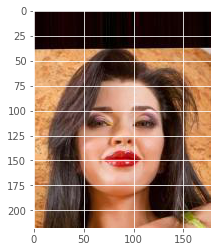

In [3]:
plt.imshow(img)

If this call works - all the images in the vector are the same size: (100, 218, 178, 3)


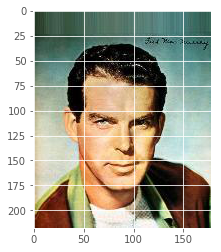

In [4]:
# Get only the first 100 images
imgs = kdutils.get_celeb_imgs()
# The zeroth image
plt.imshow(imgs[0])
# For training, we want all the images to be the same size.
# The following call only works if all the images are the same size.
data = np.array(imgs)
print("If this call works - all the images in the vector are the same size: {}".format(data.shape))

To train the dataset, all the images should be the same dimension.  At least for the first 100 they are.

In the next step, we show where the differences are between the images.  If the light is right, you can see the shadow where most of the heads are for the celebrities.

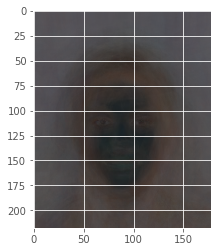

In [5]:
std_img = np.std(data, axis=0)
plt.imshow(std_img.astype(np.uint8))

A much better representation is given by processing the variance for each color channel represented separately, and then combined as a color image. We can try to look at the average variance over all color channels by taking their mean:

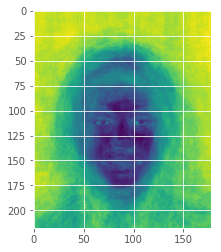

In [6]:
plt.imshow(np.mean(std_img, axis=2).astype(np.uint8))

This is showing us on average, how every color channel will vary as a heatmap. The more red, the more likely that our mean image is not the best representation. The more blue, the less likely that our mean image is far off from any other possible image.

Next, we need to flatten the matrix so that we can process it as one large vector of features.

In [7]:
flattened = data.ravel()
print(flattened[:10])

[33 58 37 26 49 29 36 59 39 36]


Visualize what the "distribution", or range and frequency of possible values are.
This helps us determine if the data is predictable or not.

Plot a histogram of every value in the vector using 255 bins. Each bin is grouping a range of values. The bars of each bin describe the frequency, or how many times anything within that range of values appears.  If there are significant changes in frequency across the values, that increases the probability that the neural network will successfully work.

(array([ 216804.,  117821.,   99125.,   71049.,   66478.,   62066.,
          62528.,   58085.,   56686.,   56114.,   56848.,   58551.,
          63168.,   61086.,   59193.,   59305.,   62526.,   63596.,
          62285.,   65061.,   63389.,   61989.,   61411.,   60742.,
          60464.,   60307.,   59074.,   59312.,   60353.,   64807.,
          67305.,   61667.,   59906.,   60546.,   62017.,   62268.,
          63030.,   62799.,   62396.,   62609.,   59541.,   58918.,
          57822.,   61451.,   63481.,   57782.,   57212.,   56516.,
          56039.,   58385.,   56252.,   55089.,   54677.,   52066.,
          51012.,   48826.,   47602.,   46064.,   45351.,   43735.,
          42849.,   42903.,   42571.,   41789.,   42412.,   42705.,
          42982.,   43107.,   43372.,   43416.,   43323.,   42808.,
          42253.,   42302.,   42008.,   41846.,   42800.,   42476.,
          42435.,   42405.,   42584.,   42612.,   42671.,   42344.,
          42610.,   42023.,   42214.,   41700., 

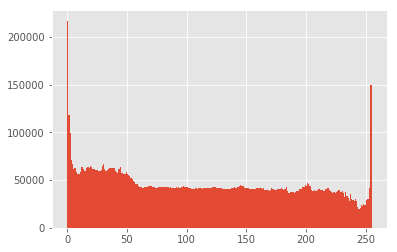

In [8]:
plt.hist(flattened.ravel(), 255)

Calculate a mean image and plot it.  Then plot a histogram of the mean of our dataset.

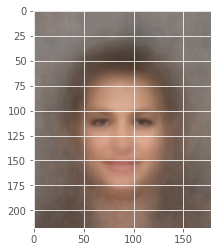

In [9]:
mean_img = np.mean(data, axis=0)
plt.imshow(mean_img.astype(np.uint8))

(array([    2.,     0.,     0.,     0.,     2.,    18.,    30.,    23.,
           42.,    42.,    43.,    41.,    51.,    48.,    30.,    52.,
           58.,    59.,    67.,    67.,    71.,    83.,    94.,   110.,
          110.,   107.,   134.,   103.,   109.,   160.,   198.,   206.,
          211.,   265.,   306.,   289.,   344.,   335.,   361.,   382.,
          402.,   390.,   400.,   497.,   544.,   594.,   663.,   679.,
          749.,   803.,   847.,   882.,   886.,   938.,   817.,   857.,
          801.,   825.,   831.,   896.,   875.,   861.,   843.,   870.,
          842.,   897.,   863.,   861.,   906.,   939.,   905.,   935.,
          946.,   972.,  1004.,  1064.,  1079.,  1124.,  1162.,  1103.,
         1129.,  1108.,  1085.,  1079.,  1051.,  1155.,  1068.,  1093.,
         1170.,  1171.,  1146.,  1213.,  1146.,  1174.,  1211.,  1229.,
         1173.,  1196.,  1216.,  1150.,  1255.,  1373.,  1344.,  1445.,
         1554.,  1554.,  1553.,  1478.,  1506.,  1469.,  1546., 

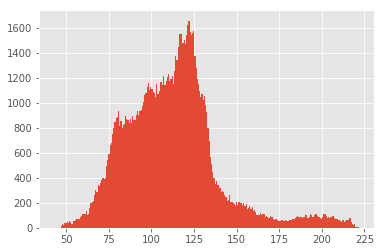

In [10]:
plt.hist(mean_img.ravel(), 255)

Subtracting the mean from the image shows all the unique information for that image.

Compare the histogram before and after "normalizing our data".
What we can see from the histograms is the original image's distribution of values from 0 - 255. The mean image's data distribution is mostly centered around the value 100. When we look at the difference of the original image and the mean image as a histogram, we can see that the distribution is now **centered** around 0. What we are seeing is the distribution of values that were above the mean image's intensity, and which were below it.

Text(0.5,1,'(img - mean) distribution')

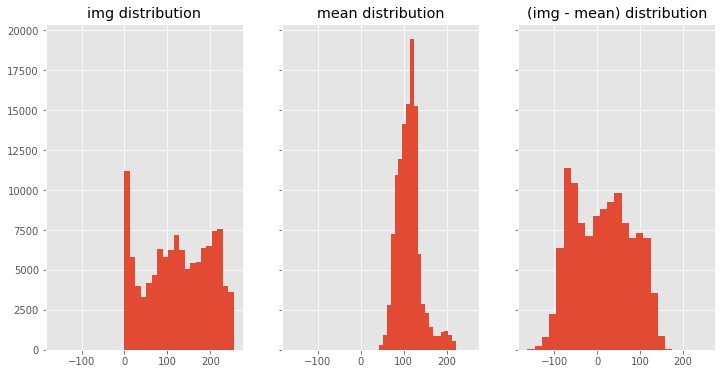

In [11]:
bins = 20
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0]).ravel(), bins)
axs[0].set_title('img distribution')
axs[1].hist((mean_img).ravel(), bins)
axs[1].set_title('mean distribution')
axs[2].hist((data[0] - mean_img).ravel(), bins)
axs[2].set_title('(img - mean) distribution')

 Complete the normalization by dividing by the standard deviation of our dataset.
 This squishes the data into a peak.

Text(0.5,1,'((img - mean) / std_dev) distribution')

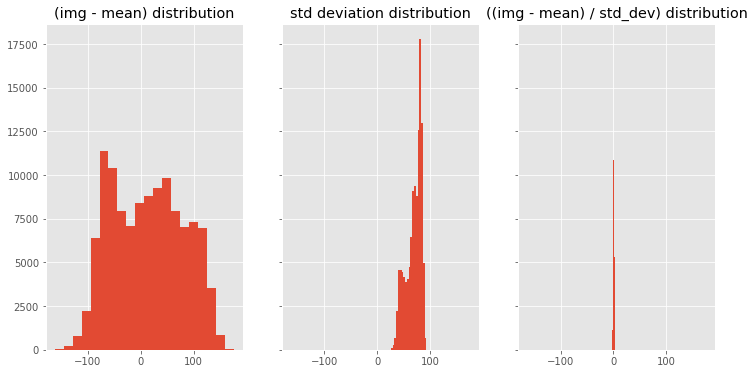

In [12]:
fig, axs = plt.subplots(1, 3, figsize=(12, 6), sharey=True, sharex=True)
axs[0].hist((data[0] - mean_img).ravel(), bins)
axs[0].set_title('(img - mean) distribution')
axs[1].hist((std_img).ravel(), bins)
axs[1].set_title('std deviation distribution')
axs[2].hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs[2].set_title('((img - mean) / std_dev) distribution')

 Plot the data at a different scale to see what is going on.  The normalized data is in the range of -3 to 3, with the bulk of the data centered around -1 to 1. 

If the data does not end up looking like this, then we should either
1. Get much more data to calculate our mean/std deviation, or
2. either try another method of normalization, such as scaling the values between 0 to 1, or -1 to 1, or possibly not bother with normalization at all.

There are other options that one could explore, including different types of normalization such as local contrast normalization for images or PCA based normalization - not covered here.

I note that these techniques are applicable to any dataset.  Centering and scaling are critical to the success of almost all learning techniques.  Mostly this has to do with numerical issues, but having features that are weighted artificially is not desirable at all.

(-5, 5)

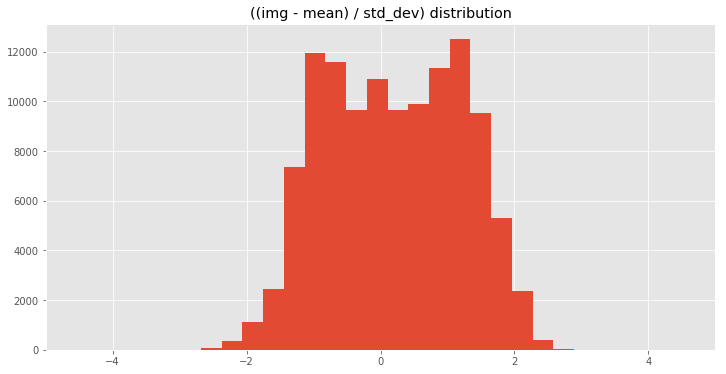

In [13]:
fig, axs = plt.subplots(1, 1, figsize=(12, 6), sharey=True, sharex=True)
axs.hist(((data[0] - mean_img) / std_img).ravel(), bins)
axs.set_title('((img - mean) / std_dev) distribution')
axs.set_xlim([-5, 5])


# TensorFlow
## TensorFlow Basics

In [14]:
import tensorflow as tf

In TensorFlow we work with linear spaces, that is one-dimensional vectors of data.  Recall from above that these vectors will represent features to process.

In [15]:
x = tf.linspace(-3.0, 3.0, 100)
print(type(x))
print(x)

<class 'tensorflow.python.framework.ops.Tensor'>
Tensor("LinSpace:0", shape=(100,), dtype=float32)


Think of tf.Tensors the same way as you would the numpy.array.
It is described by its shape, in this case, only 1 dimension of 100 values.
And it has a dtype, in this case, float32.  However, values are not computed yet. Instead, it just refers to the output of a tf.Operation which has been already been added to Tensorflow's default computational graph. The result of that operation is the tensor that we are returned.

Tensor flow consists of a **graph**:

In [16]:
g = tf.get_default_graph()

with **operations** defined on the graph:

In [17]:
[op.name for op in g.get_operations()]

['LinSpace/start', 'LinSpace/stop', 'LinSpace/num', 'LinSpace']

Tensorflow has named each of the operations in the graph to reflect what they are doing. There are a few parameters that are all prefixed by LinSpace, and then the last one which is the operation which takes all of the parameters and creates an output for the linspace.

A **Tensor** is the output of any operation and can be obtained by asking the graph for the tensor's name as shown below.
The following query retrieves the tf.Tensor that comes from the operation "LinSpace". The result of a tf.Operationis a tf.Tensor. Remember that was the same name as the tensor x we created before.

In [18]:
g.get_tensor_by_name('LinSpace' + ':0')

<tf.Tensor 'LinSpace:0' shape=(100,) dtype=float32>

Create a **session** to compute anything in tensorflow:

In [19]:
# We're first going to create a session:
sess = tf.Session()

# Now we tell our session to compute anything we've created in the tensorflow graph.
computed_x = sess.run(x)
print(computed_x)

# Alternatively, we could tell the previous Tensor to evaluate itself using this session:
computed_x = x.eval(session=sess)
print(computed_x)

# We can close the session after we're done like so:
sess.close()

[-3.         -2.939394   -2.87878799 -2.81818175 -2.75757575 -2.69696975
 -2.63636351 -2.5757575  -2.5151515  -2.4545455  -2.3939395  -2.33333325
 -2.27272725 -2.21212125 -2.15151501 -2.090909   -2.030303   -1.969697
 -1.90909088 -1.84848475 -1.78787875 -1.72727275 -1.66666663 -1.6060605
 -1.5454545  -1.4848485  -1.42424238 -1.36363626 -1.30303025 -1.24242425
 -1.18181813 -1.12121201 -1.060606   -1.         -0.939394   -0.87878776
 -0.81818175 -0.75757575 -0.69696951 -0.63636351 -0.5757575  -0.5151515
 -0.4545455  -0.39393926 -0.33333325 -0.27272725 -0.21212101 -0.15151501
 -0.090909   -0.030303    0.030303    0.09090924  0.15151525  0.21212125
  0.27272749  0.33333349  0.3939395   0.4545455   0.5151515   0.57575774
  0.63636374  0.69696975  0.75757599  0.81818199  0.87878799  0.939394    1.
  1.060606    1.12121201  1.18181849  1.24242449  1.30303049  1.36363649
  1.4242425   1.4848485   1.5454545   1.60606098  1.66666698  1.72727299
  1.78787899  1.84848499  1.909091    1.969697    2

We can create a new graph and open a session on that graph (the session opens the default graph when no graph is entered).

In [20]:
g2 = tf.Graph()
sess = tf.Session(graph=g2)
sess.close()

To work with iPython's interactive session.

In [21]:
sess = tf.InteractiveSession()
x.eval()

array([-3.        , -2.939394  , -2.87878799, -2.81818175, -2.75757575,
       -2.69696975, -2.63636351, -2.5757575 , -2.5151515 , -2.4545455 ,
       -2.3939395 , -2.33333325, -2.27272725, -2.21212125, -2.15151501,
       -2.090909  , -2.030303  , -1.969697  , -1.90909088, -1.84848475,
       -1.78787875, -1.72727275, -1.66666663, -1.6060605 , -1.5454545 ,
       -1.4848485 , -1.42424238, -1.36363626, -1.30303025, -1.24242425,
       -1.18181813, -1.12121201, -1.060606  , -1.        , -0.939394  ,
       -0.87878776, -0.81818175, -0.75757575, -0.69696951, -0.63636351,
       -0.5757575 , -0.5151515 , -0.4545455 , -0.39393926, -0.33333325,
       -0.27272725, -0.21212101, -0.15151501, -0.090909  , -0.030303  ,
        0.030303  ,  0.09090924,  0.15151525,  0.21212125,  0.27272749,
        0.33333349,  0.3939395 ,  0.4545455 ,  0.5151515 ,  0.57575774,
        0.63636374,  0.69696975,  0.75757599,  0.81818199,  0.87878799,
        0.939394  ,  1.        ,  1.060606  ,  1.12121201,  1.18

In [22]:
# We can find out the shape of a tensor like so:
print(x.get_shape())

# %% Or in a more friendly format
print(x.get_shape().as_list())

(100,)
[100]


### Series of Operations
Create a Gaussian curve which resembles a normalized histogram where most of the data is centered around the mean of 0. It's also sometimes refered to by the bell curve or normal curve.

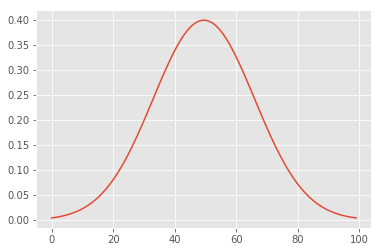

In [23]:
# The 1 dimensional gaussian takes two parameters, the mean value, and the standard deviation, which is commonly denoted by the name sigma.
mean = 0.0
sigma = 1.0

# Gaussian curve.
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
     (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))

# Nothing has been evaluated yet.  Evaluate and plot
res = z.eval()
plt.plot(res)

### Create a 2-D Gaussian Kernel

Create a 2-dimensional Gaussian by multiplying a vector by its transpose, e.g., $x x^t$. This is about 98% of what neural networks do.

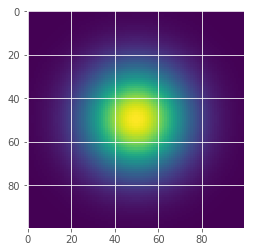

In [24]:
# Let's store the number of values in our Gaussian curve.
ksize = z.get_shape().as_list()[0]

# Let's multiply the two to get a 2d gaussian.  The reshapes get the dimensions right (e.g., ksize x 1 times 1 x ksize)
z_2d = tf.matmul(tf.reshape(z, [ksize, 1]), tf.reshape(z, [1, ksize]))

# Execute the graph
plt.imshow(z_2d.eval())

### Convolving an Image with a Gaussian

A very common operation that we'll come across with Deep Learning is convolution, e.g., [CNNs](http://deeplearning.net/tutorial/lenet.html).  One way to think about this is that our kernel *z_2d* can be used to filter information, e.g., we can filter image data using this Gaussian function, as if the gaussian function is the lens through which we'll see our image data. he Gaussian's kernel allows a lot of information at the center and then decesasingly less as you go farther away from the center. The effect of convolving the image with this type of kernel is that the entire image will be blurred.  This [website](http://setosa.io/ev/image-kernels/) allows interactive exploration of image convolution.

(512, 512)


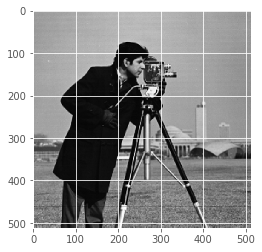

In [25]:
# Let's first load an image.  We're going to need a grayscale image to begin with.
# skimage has some images we can play with.  If you do not have the skimage module,
# you can load your own image, or get skimage by pip installing "scikit-image".
from skimage import data
img = data.camera().astype(np.float32)
plt.imshow(img, cmap='gray')
print(img.shape)



The shape is 2-dimensional. For image convolution in Tensorflow, images must be 4 dimensional. When we loaded all the previous images, the 4-dimensional array was

Number x Height x Width x Color

To perform 2d convolution with tensorflow, we'll need the same dimensions for our image. With just 1 grayscale image, the shape will be:

1 x Height x Weight x 1


In [26]:
# We could use the numpy reshape function to reshape our numpy array
img_4d = img.reshape([1, img.shape[0], img.shape[1], 1])
print(img_4d.shape)

# but since we'll be using tensorflow, we can use the tensorflow reshape function:
img_4d = tf.reshape(img, [1, img.shape[0], img.shape[1], 1])
print(img_4d)

# With a tensorflow tensor we can't access the shape parameter like we did with the numpy array.
# Use get_shape(), and get_shape().as_list():
print(img_4d.get_shape())
print(img_4d.get_shape().as_list())

(1, 512, 512, 1)
Tensor("Reshape_2:0", shape=(1, 512, 512, 1), dtype=float32)
(1, 512, 512, 1)
[1, 512, 512, 1]


The H x W image is now part of a 4 dimensional array with one image and one channel (color).  Reshape our Gaussian Kernel to be 4-dimensional as well, however, the dimensions for kernels are slightly different.  The image is:

Number of Images x Image Height x Image Width x Number of Channels

and for the kernel we have:

Kernel Height x Kernel Width x Number of Input Channels x Number of Output Channels

Our Kernel already has a height and width of ksize but eventually we will want the two to be the same.

In [27]:
# Reshape the 2d kernel to tensorflow's required 4d format: H x W x I x O
z_4d = tf.reshape(z_2d, [ksize, ksize, 1, 1])
print(z_4d.get_shape().as_list())

[100, 100, 1, 1]


### Convolve/Filter an image using a Gaussian Kernel

We can now use our previous Gaussian Kernel to convolve our image.  There are two new parameters here: strides, and padding. Strides says how to move our kernel across the image. Basically, we'll only ever use it for one of two sets of parameters:

\[1, 1, 1, 1\] \- convolve every single image, every pixel, and every color channel by whatever the kernel is.

and the second option:

\[1, 2, 2, 1\] \- convolve every single image, but every other pixel, in every single color channel.

Padding says what to do at the borders. If we say "SAME", that means we want the same dimensions going in as we do going out. In order to do this, zeros must be padded around the image. If we say "VALID", that means no padding is used, and the image dimensions will actually change.

In [28]:
convolved = tf.nn.conv2d(img_4d, z_4d, strides=[1, 1, 1, 1], padding='SAME')
res = convolved.eval()
print(res.shape)

(1, 512, 512, 1)


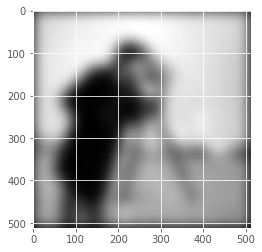

In [29]:
# Matplotlib cannot handle plotting 4D images!  We'll have to convert this back to the original shape.
# There are a few ways we could do this.  We could plot by "squeezing" the singleton dimensions.
plt.imshow(np.squeeze(res), cmap='gray')

# Or we could specify the exact dimensions we want to visualize:
plt.imshow(res[0, :, :, 0], cmap='gray')

### Gabor Kernel

The Gabor kernel is a lot like the Gaussian kernel, except we use a sine wave to modulate that.  Use linspace to get a set of values the same range as our gaussian, which should be from -3 standard deviations to +3 standard deviations.

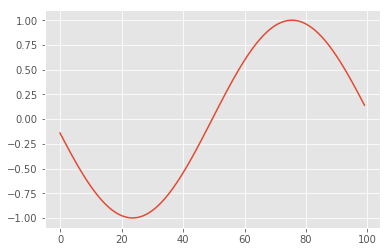

In [30]:
xs = tf.linspace(-3.0, 3.0, ksize)

# Calculate the sine of xs which should give us a nice wave
ys = tf.sin(xs)
plt.figure()
plt.plot(ys.eval())

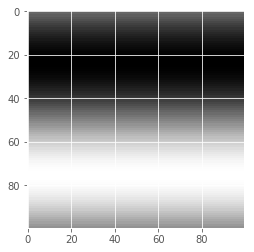

In [31]:
# For multiplication, we'll need to convert this 1-dimensional vector to a matrix: N x 1
ys = tf.reshape(ys, [ksize, 1])

# Repeat this wave across the matrix by using a multiplication of ones:
ones = tf.ones((1, ksize))
wave = tf.matmul(ys, ones)
plt.imshow(wave.eval(), cmap='gray')

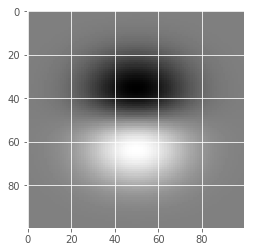

In [32]:
# Multiply our Gaussian kernel by this wave and get a gabor kernel:
gabor = tf.multiply(wave, z_2d)
plt.imshow(gabor.eval(), cmap='gray')

### Convolve an image the Gabor kernel

We've already gone through the work of convolving an image. The only thing that has changed is the kernel that we want to convolve with. We could have made life easier by specifying in our graph which elements we wanted to be specified later. Tensorflow calls these "placeholders" - we're not sure what the values are yet, but we know they'll fit in the graph like so, generally the input and output of the network.

**Placeholders Explained**

So far we have used Variables to manage our data, but there is a more basic structure, the placeholder. A placeholder is simply a variable that we will assign data to at a later date. It allows us to create our operations and build our computation graph, without needing the data. In TensorFlow terminology, we then feed data into the graph through these placeholders.

```python
import tensorflow as tf

# Create a placeholder called x - the place in memory where we sill store a value later on.
x = tf.placeholder("float", None)

# Create a tensor y which is the operation of multiplying x by 2.  There are no values for x yet.
y = x * 2

# We now have an operation (y) defined, and can now run it in a session. We create a session object,
# and then run just the y variable. Note that this means, that if we defined a much larger graph of
# operations, we can run just a small segment of the graph. This subgraph evaluation is actually a
# bit selling point of TensorFlow, and one that isn’t present in many other libraries that do similar things.
with tf.Session() as session:
    # Running y requires knowledge about the values of x. We define these inside the feed_dict argument
    # to run. We state here that the values of x are [1, 2, 3]. We run y, giving us the result of [2, 4, 6].
    result = session.run(y, feed_dict={x: [1, 2, 3]})
    print(result)
```
*Back to Convolution*

Rewrite the convolution operation using a placeholder for the image and the kernel and then see how the same operation could have been done. We're going to set the image dimensions to None x None. This is something special for placeholders which tells tensorflow "let this dimension be any possible value". 1, 5, 100, 1000, it doesn't matter.

In [33]:
# This is a placeholder which will become part of the tensorflow graph, but
# which we have to later explicitly define whenever we run/evaluate the graph.
# Pretty much everything you do in tensorflow can have a name.  If we don't
# specify the name, tensorflow will give a default one, like "Placeholder_0".
# Let's use a more useful name to help us understand what's happening.
img = tf.placeholder(tf.float32, shape=[None, None], name='img')


# We'll reshape the 2d image to a 3-d tensor just like before:
# Except now we'll make use of another tensorflow function, expand dims, which adds a singleton dimension at the axis we specify.
# We use it to reshape our H x W image to include a channel dimension of 1
# our new dimensions will end up being: H x W x 1
img_3d = tf.expand_dims(img, 2)
dims = img_3d.get_shape()
print(dims)

# And again to get: 1 x H x W x 1
img_4d = tf.expand_dims(img_3d, 0)
print(img_4d.get_shape().as_list())

# Let's create another set of placeholders for our Gabor's parameters:
mean = tf.placeholder(tf.float32, name='mean')
sigma = tf.placeholder(tf.float32, name='sigma')
ksize = tf.placeholder(tf.int32, name='ksize')

# Then finally redo the entire set of operations we've done to convolve our
# image, except with our placeholders
x = tf.linspace(-3.0, 3.0, ksize)
z = (tf.exp(tf.negative(tf.pow(x - mean, 2.0) /
                   (2.0 * tf.pow(sigma, 2.0)))) *
      (1.0 / (sigma * tf.sqrt(2.0 * 3.1415))))
z_2d = tf.matmul(
  tf.reshape(z, tf.stack([ksize, 1])),
  tf.reshape(z, tf.stack([1, ksize])))
ys = tf.sin(x)
ys = tf.reshape(ys, tf.stack([ksize, 1]))
ones = tf.ones(tf.stack([1, ksize]))
wave = tf.matmul(ys, ones)
gabor = tf.multiply(wave, z_2d)
gabor_4d = tf.reshape(gabor, tf.stack([ksize, ksize, 1, 1]))

# And finally, convolve the two:
convolved = tf.nn.conv2d(img_4d, gabor_4d, strides=[1, 1, 1, 1], padding='SAME', name='convolved')
convolved_img = convolved[0, :, :, 0]

(?, ?, 1)
[1, None, None, 1]


We have created an entire graph from our placeholders which is capable of convolving an image with a gabor kernel. In order to compute it, we have to specify all of the placeholders required for its computation. If we try to evaluate it without specifying placeholders beforehand, we will get an error InvalidArgumentError: You must feed a value for placeholder tensor 'img' with dtype float and shape \[512,512\]:

```python
convolved_img.eval()
```
<font 'color=red'>
\-----------------------------------------------------------------  
InvalidArgumentError              Traceback (most recent call last)

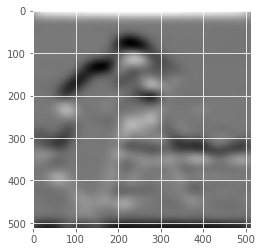

In [34]:
# Specifiy all the placeholders - mean, sigma, ksize, the image.

res = convolved_img.eval(feed_dict={
    img: data.camera(), mean:0.0, sigma:1.0, ksize:100})
plt.imshow(res, cmap='gray')

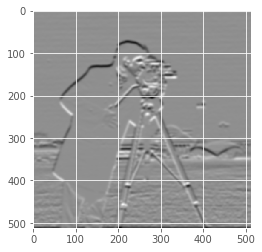

In [35]:
res = convolved_img.eval(feed_dict={
    img: data.camera(),
    mean: 0.0,
    sigma: 0.5,
    ksize: 32
  })
plt.imshow(res, cmap='gray')

**Reading Material**

Abadi, M., Agarwal, A., Barham, P., Brevdo, E., Chen, Z., Citro, C., … Zheng, X. (2015). TensorFlow : Large-Scale Machine Learning on Heterogeneous Distributed Systems. https://arxiv.org/abs/1603.04467

Yoshua Bengio, Aaron Courville, Pascal Vincent. Representation Learning: A Review and New Perspectives. 24 Jun 2012. https://arxiv.org/abs/1206.5538

J. Schmidhuber. Deep Learning in Neural Networks: An Overview. Neural Networks, 61, p 85-117, 2015. https://arxiv.org/abs/1404.7828

LeCun, Yann, Yoshua Bengio, and Geoffrey Hinton. “Deep learning.” Nature 521, no. 7553 (2015): 436-444.

Ian Goodfellow Yoshua Bengio and Aaron Courville. Deep Learning. 2016. http://www.deeplearningbook.org/